# Table of Contents

- [Data Preparation](#Data-Preparation)
    - [Importing Libraries](#Importing-Libraries)
    - [Defining Sturges Function](#Defining-Sturges-Function)
    - [Loading Data](#Loading-data)
    - [Data Preprocessing](#Data-Preprocessing)
- [General Statistics](#General-Statistics)
    - [Plotting Histograms of Integrals Data Sets](#Plotting-Histograms-of-Integrals-Data-Sets)
    - [Plotting Empirical Cumulative Distribution Functions of Integrals Data Sets](#Plotting-Empirical-Cumulative-Distribution-Functions-of-Integrals-Data-Sets)
    - [Plotting Boxplots of Integrals Data Sets](#Plotting-Boxplots-of-Integrals-Data-Sets)
    - [Calculating the Means of the Integrals Data Sets](#Calculating-the-Means-of-the-Integrals-Data-Sets)
    - [Calculating the Variances of the Integrals Data Sets](#Calculating-the-Variances-of-the-Integrals-Data-Sets)
    - [Calculating the Standard Deviations of the Integrals Data Sets](#Calculating-the-Standard-Deviations-of-the-Integrals-Data-Sets)
- [Stats by time](#Stats-by-time)
- [Finding Hours with More Traffic](#Finding-Hours-with-More-Traffic)
- [Correlation Stats in Hours with More Traffic](#Correlation-Stats-in-Hours-with-More-Traffic)
- [Comparation between Devices](#Comparation-between-Devices)
- [Conclusion](#Conclusion)

# Data Preparation

### Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.distributions.empirical_distribution import ECDF

### Defining Sturges Function

In [29]:
def get_sturges_bins(data: pd.Series) -> int:
    """
    Calculates the number of bins for a histogram using Sturges' rule.

    Args:
        data: A pandas Series representing the data for which the number of bins is to be calculated.

    Returns:
        An integer representing the optimal number of bins for a histogram.
    """
    num_bins = int(1 + 3.3 * np.log10(len(data)))
    return num_bins

### Loading data

In [30]:
smart_tv_data = pd.read_csv('./csv/dataset_smart-tv.csv')
chromecast_data = pd.read_csv('./csv/dataset_chromecast.csv')

### Data Preprocessing

In [31]:
smart_tv_data[["bytes_up", "bytes_down"]] += 1
chromecast_data[["bytes_up", "bytes_down"]] += 1
smart_tv_data[["bytes_up", "bytes_down"]] = np.log10(smart_tv_data[["bytes_up", "bytes_down"]])
chromecast_data[["bytes_up", "bytes_down"]] = np.log10(chromecast_data[["bytes_up", "bytes_down"]])

# General Statistics

### Plotting Histograms of Integrals Data Sets

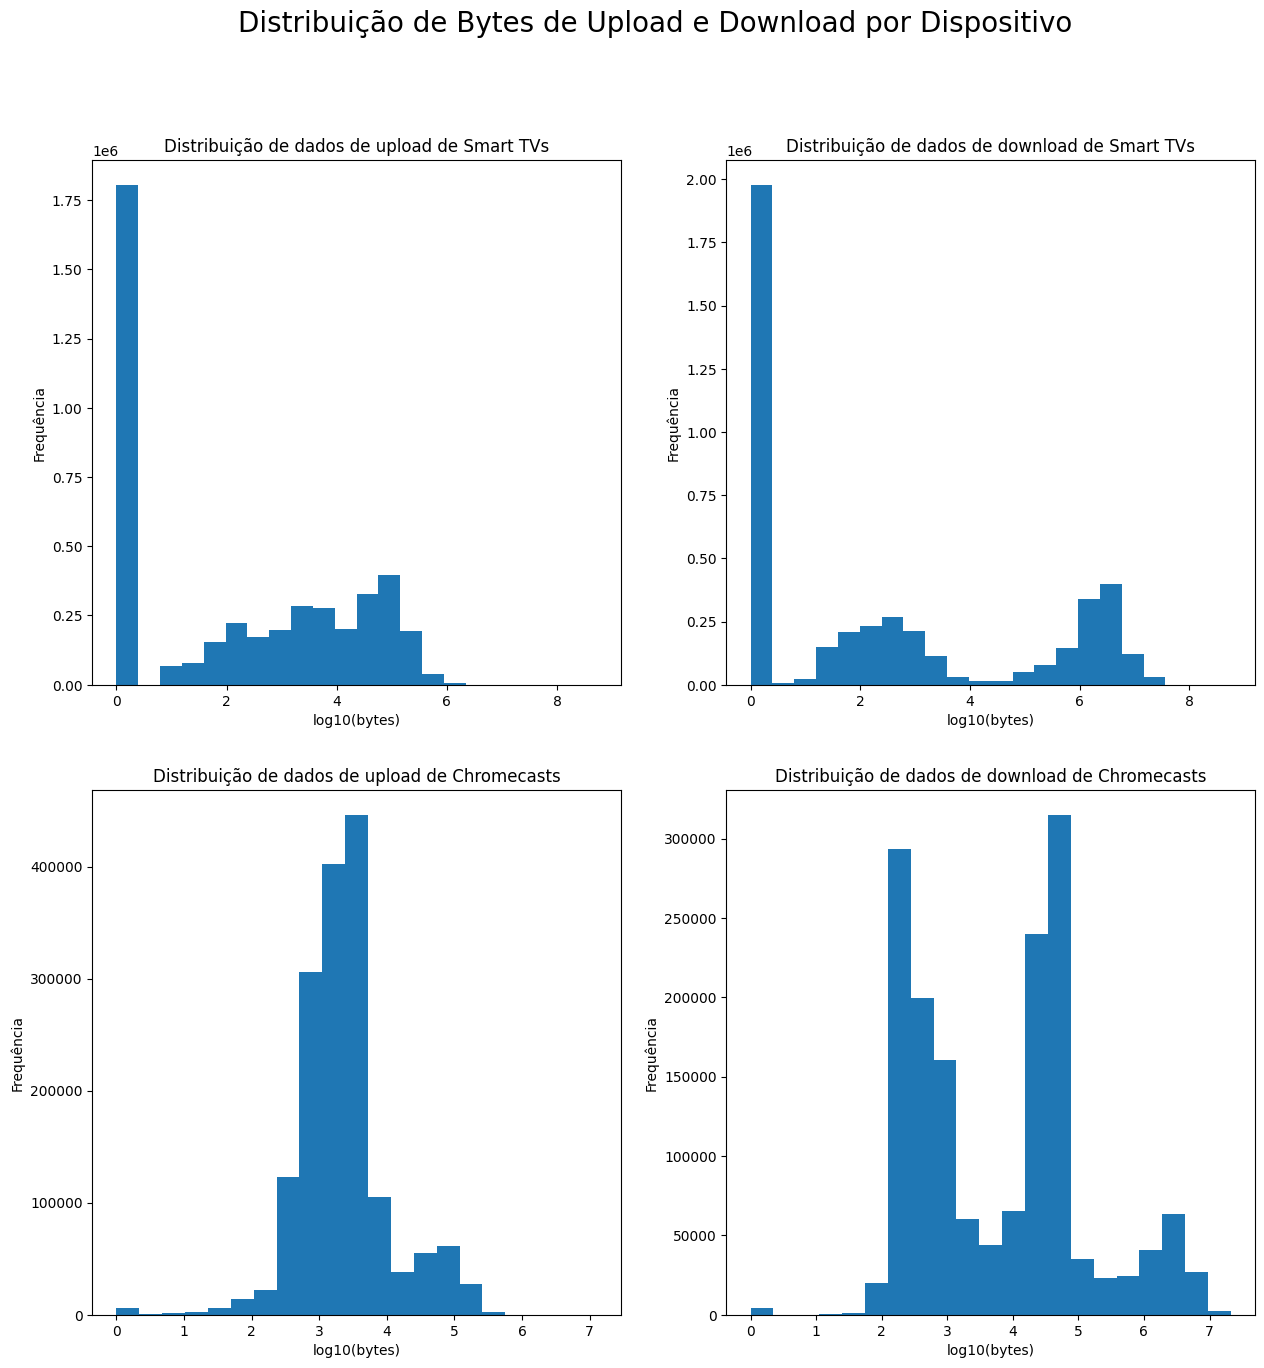

In [32]:
def plot_histogram(ax: plt.Axes, data: pd.Series, title: str) -> None:
    """
    Plots a histogram of the given data on the given axis.

    Args:
        ax: A matplotlib Axes object representing the axis on which the histogram is to be plotted.
        data: A pandas Series representing the data to be plotted.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    bins = get_sturges_bins(data)
    ax.hist(data, bins=bins)
    ax.set_title(title)
    ax.set_xlabel("log10(bytes)")
    ax.set_ylabel("Frequência")

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Distribuição de Bytes de Upload e Download por Dispositivo', fontsize=20)

plot_histogram(ax[0][0], smart_tv_data['bytes_up'], "Distribuição de dados de upload de Smart TVs")
plot_histogram(ax[0][1], smart_tv_data['bytes_down'], "Distribuição de dados de download de Smart TVs")
plot_histogram(ax[1][0], chromecast_data['bytes_up'], "Distribuição de dados de upload de Chromecasts")
plot_histogram(ax[1][1], chromecast_data['bytes_down'], "Distribuição de dados de download de Chromecasts")

plt.show()    

### Plotting Empirical Cumulative Distribution Functions of Integrals Data Sets

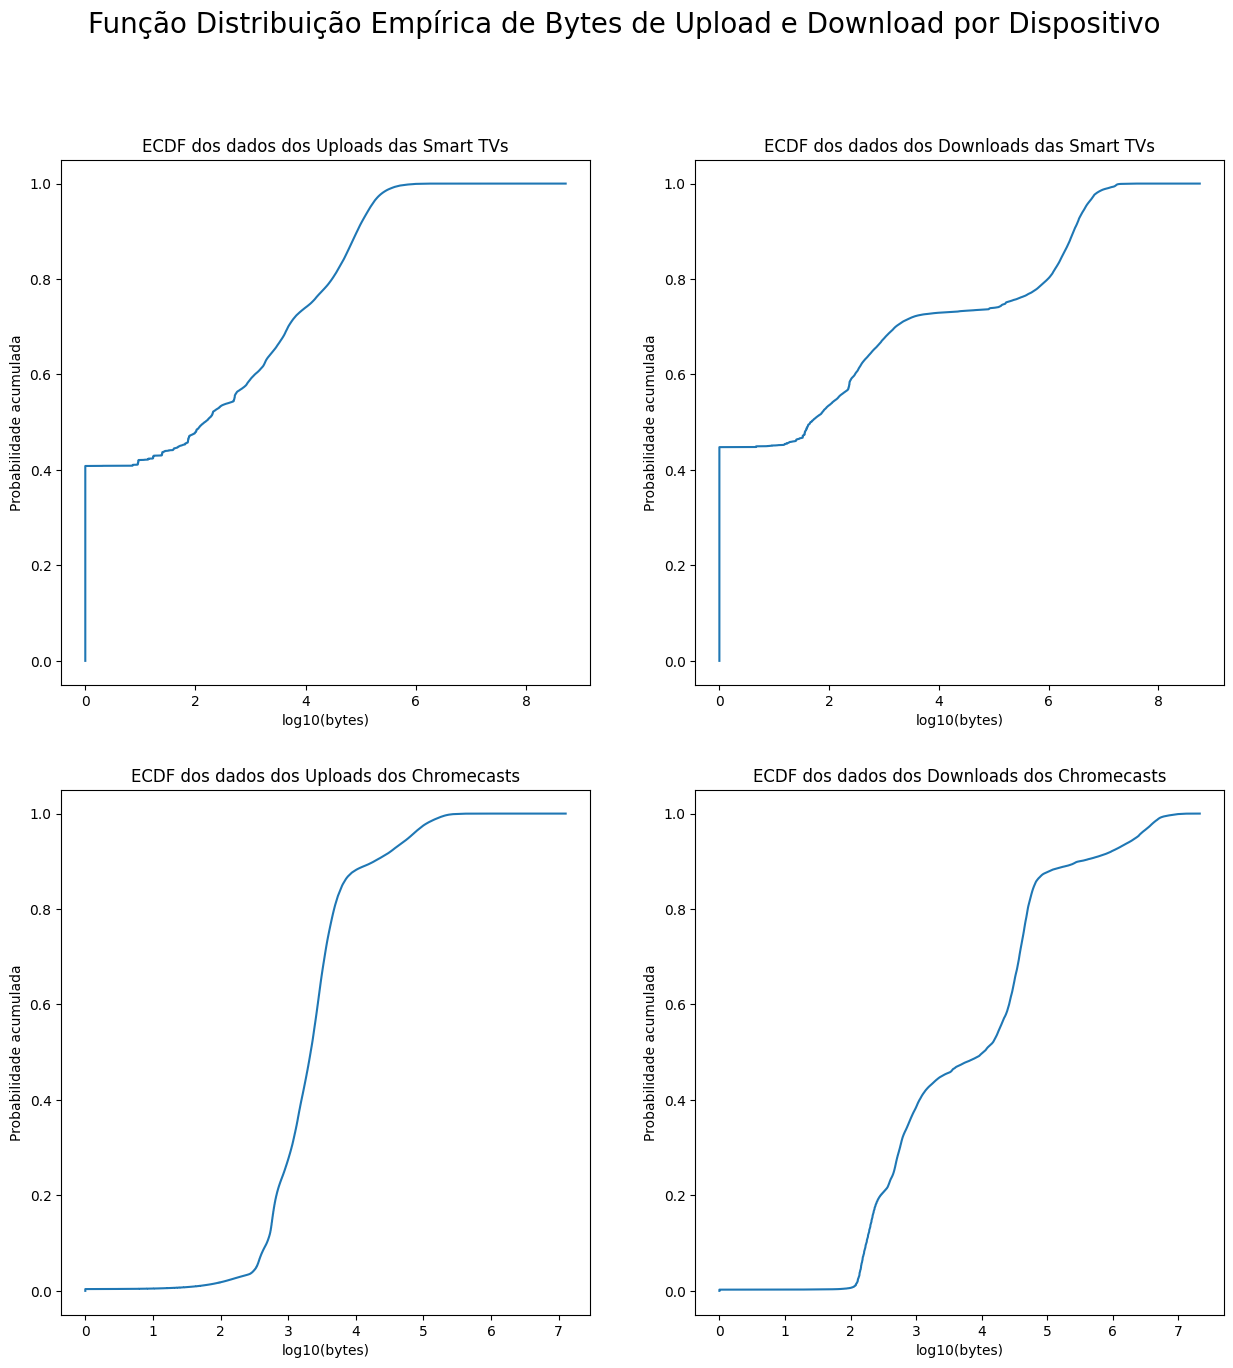

In [33]:
def plot_ecdf(ax: plt.Axes, data: pd.Series, title: str) -> None:
    """
    Creates a plot with the empirical cumulative distribution function (ECDF) of the given data.
    
    Parameters:
        ax: A matplotlib Axes object representing the axis on which the histogram is to be plotted.
        data: A pandas Series representing the data to be plotted.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    ecdf = ECDF(data)
    ax.plot(ecdf.x, ecdf.y)
    ax.set_title(title)
    ax.set_xlabel("log10(bytes)")
    ax.set_ylabel("Probabilidade acumulada")

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Função Distribuição Empírica de Bytes de Upload e Download por Dispositivo', fontsize=20)

plot_ecdf(ax[0][0], smart_tv_data['bytes_up'], "ECDF dos dados dos Uploads das Smart TVs")
plot_ecdf(ax[0][1], smart_tv_data['bytes_down'], "ECDF dos dados dos Downloads das Smart TVs")
plot_ecdf(ax[1][0], chromecast_data['bytes_up'], "ECDF dos dados dos Uploads dos Chromecasts")
plot_ecdf(ax[1][1], chromecast_data['bytes_down'], "ECDF dos dados dos Downloads dos Chromecasts")
    
plt.show()

### Plotting Boxplots of Integrals Data Sets

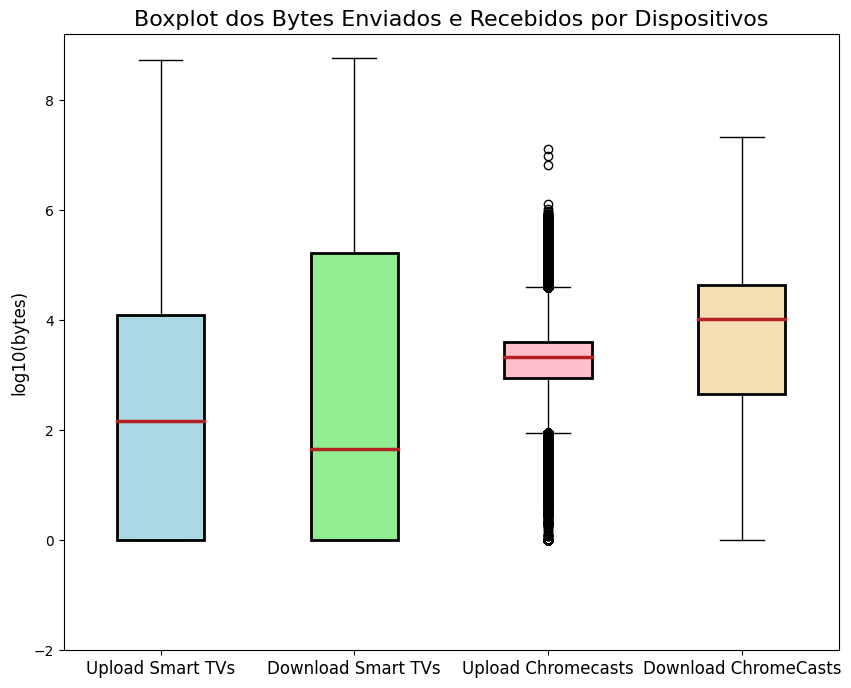

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))

boxprops = dict(linestyle='-', linewidth=2, color='black')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')

bp = ax.boxplot([smart_tv_data['bytes_up'], smart_tv_data['bytes_down'], chromecast_data['bytes_up'], chromecast_data['bytes_down']],
                boxprops=boxprops, medianprops=medianprops, patch_artist=True)

colors = ['lightblue', 'lightgreen', 'pink', 'wheat']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['Upload Smart TVs', 'Download Smart TVs', 'Upload Chromecasts', 'Download ChromeCasts'], fontsize=12)
ax.set_ylabel('log10(bytes)', fontsize=12)
ax.set_title('Boxplot dos Bytes Enviados e Recebidos por Dispositivos', fontsize=16)

ax.grid(False)
ax.set_ylim(bottom=-2)

plt.show()

### Calculating the Means of the Integrals Data Sets

In [35]:
means = {
    'smart_tv_up': np.mean(smart_tv_data['bytes_up']),
    'smart_tv_down': np.mean(smart_tv_data['bytes_down']),
    'chromecast_up': np.mean(chromecast_data['bytes_up']),
    'chromecast_down': np.mean(chromecast_data['bytes_down'])
}

means

{'smart_tv_up': 2.158288206507635,
 'smart_tv_down': 2.351678620482737,
 'chromecast_up': 3.3502996618084153,
 'chromecast_down': 3.800045706037558}

### Calculating the Variances of the Integrals Data Sets

In [36]:
vars = {
    'smart_tv_up': np.var(smart_tv_data['bytes_up']),
    'smart_tv_down': np.var(smart_tv_data['bytes_down']),
    'chromecast_up': np.var(chromecast_data['bytes_up']),
    'chromecast_down': np.var(chromecast_data['bytes_down'])
}

vars

{'smart_tv_up': 4.110138414147299,
 'smart_tv_down': 6.721322376032034,
 'chromecast_up': 0.45996836246102296,
 'chromecast_down': 1.663894572605984}

### Calculating the Standard Deviations of the Integrals Data Sets

In [37]:
stds = {
    'smart_tv_up': np.std(smart_tv_data['bytes_up']),
    'smart_tv_down': np.std(smart_tv_data['bytes_down']),
    'chromecast_up': np.std(chromecast_data['bytes_up']),
    'chromecast_down': np.std(chromecast_data['bytes_down'])
}

stds

{'smart_tv_up': 2.0273476303158517,
 'smart_tv_down': 2.5925513256311885,
 'chromecast_up': 0.6782096744083078,
 'chromecast_down': 1.2899203745216152}

# Stats by time

### Converting Datetime to Hour

In [38]:
def convert_date_hour(df):
    df["date_hour"] = [datetime.strptime(x, "%Y-%m-%d %H:%M:%S").hour for x in df["date_hour"]]

convert_date_hour(smart_tv_data)
convert_date_hour(chromecast_data)

### Plotting Boxplots of Smart TV Data Set by Hour

<Axes: title={'center': 'bytes_up'}, xlabel='date_hour'>

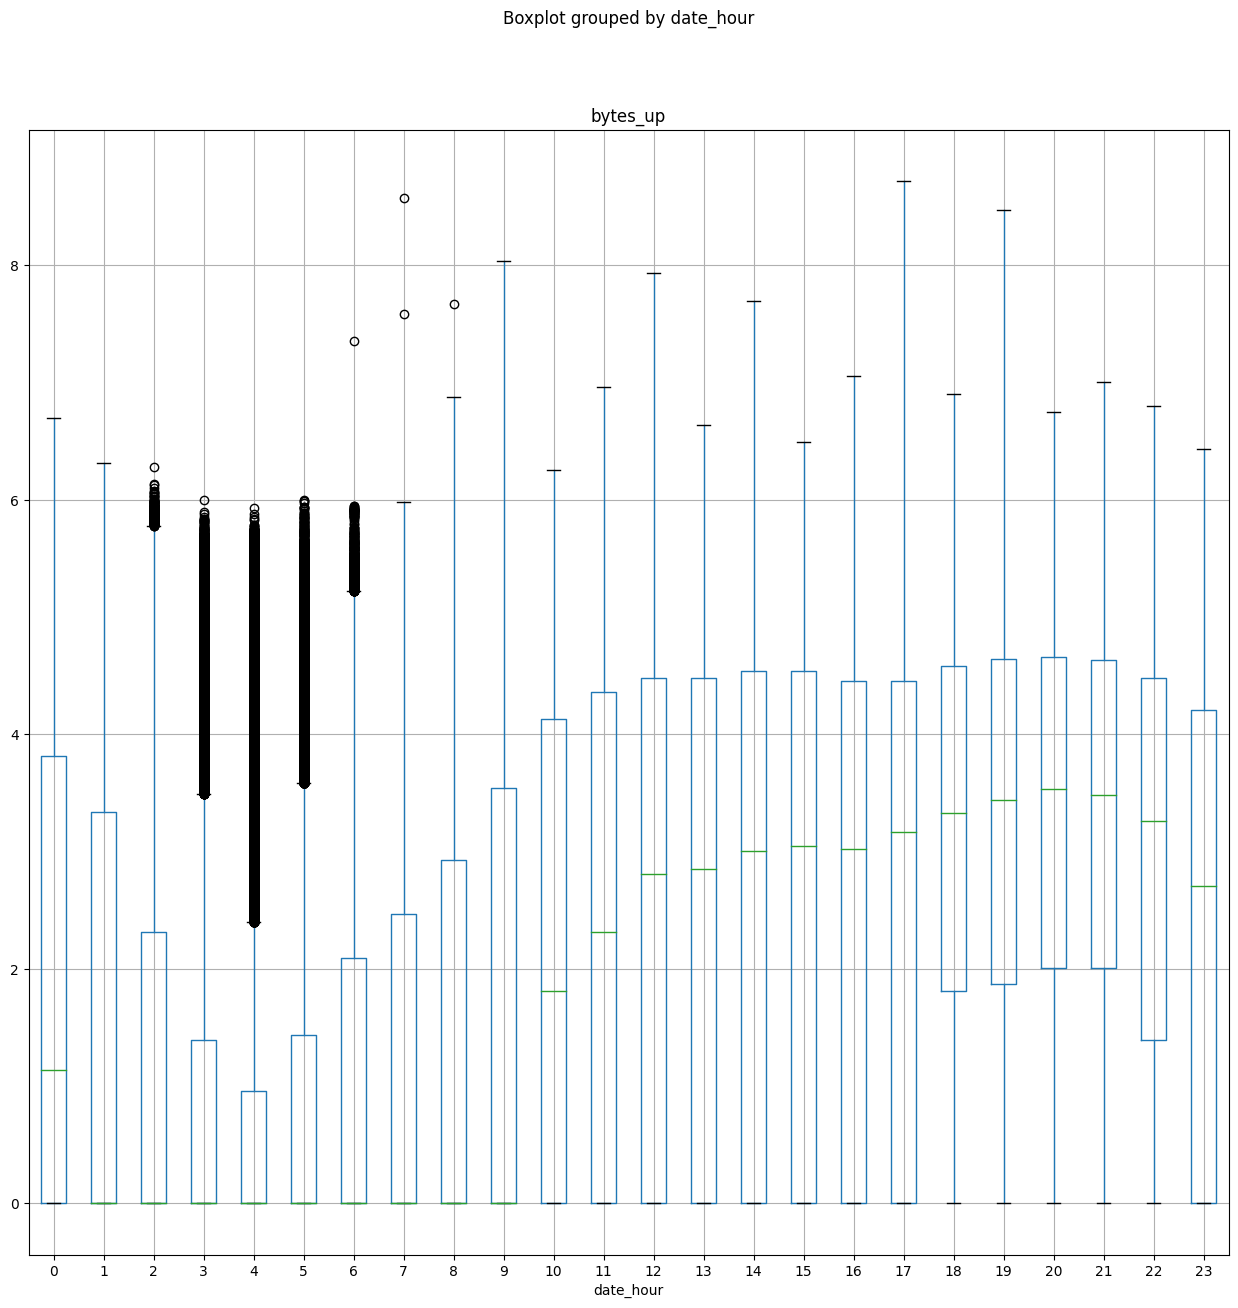

In [49]:
smart_tv_data.boxplot(column="bytes_up", by="date_hour", figsize=(15, 15))

<Axes: title={'center': 'bytes_down'}, xlabel='date_hour'>

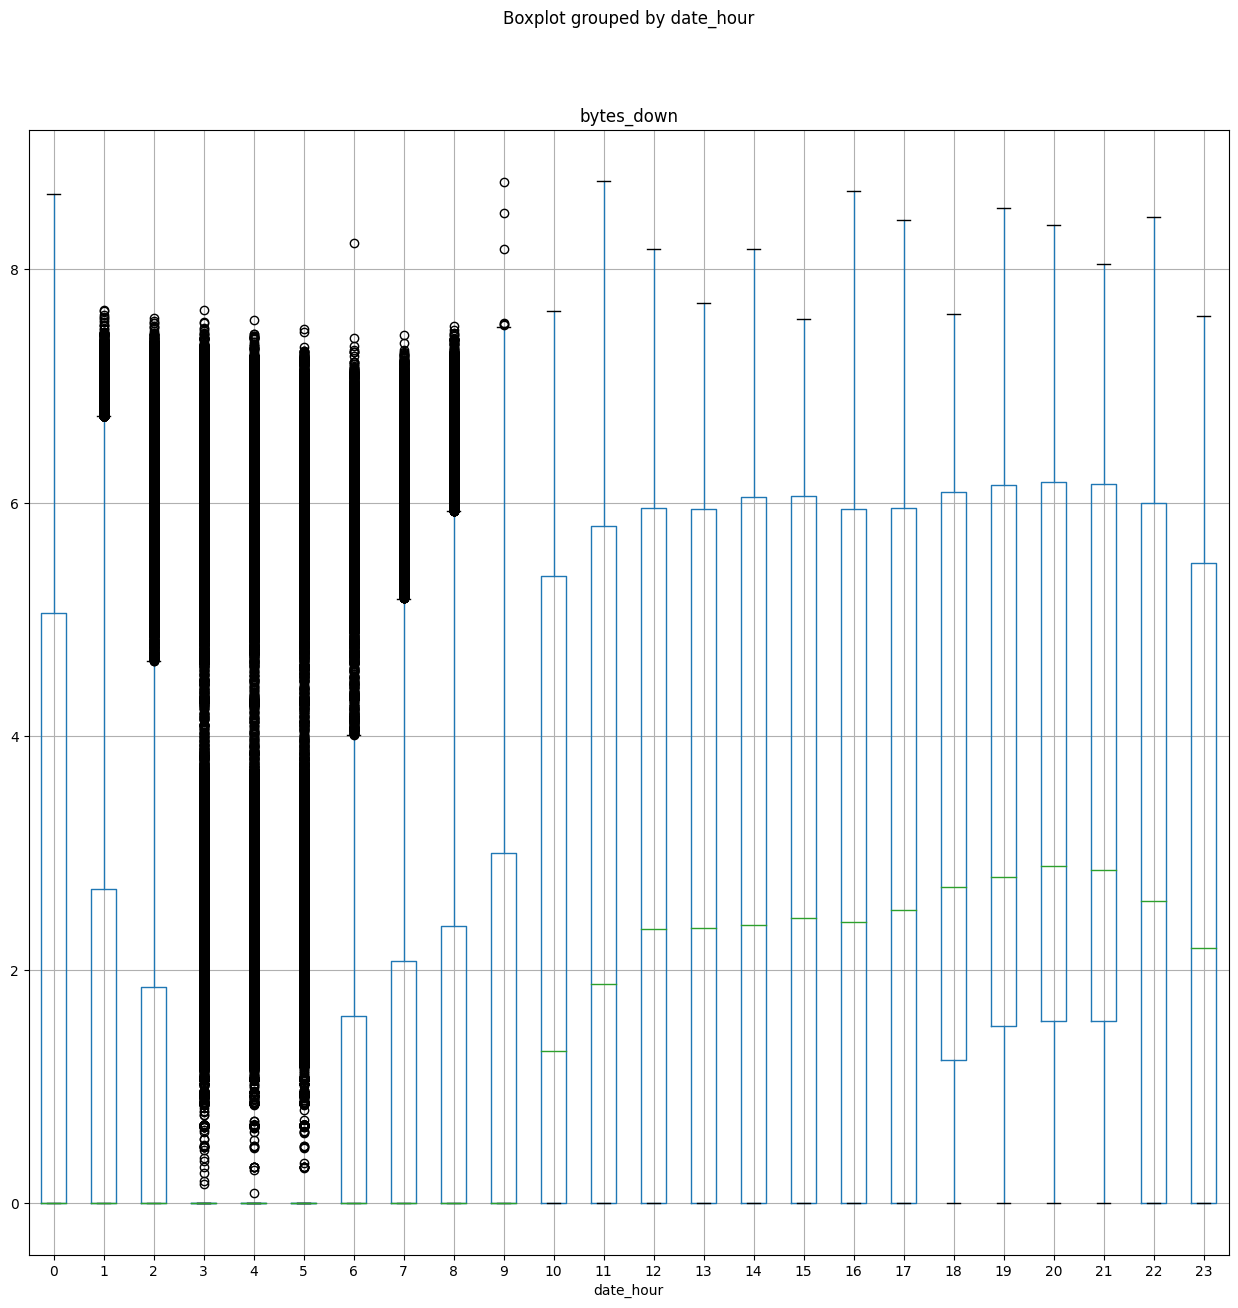

In [50]:
smart_tv_data.boxplot(column="bytes_down", by="date_hour", figsize=(15, 15))

### Plotting Boxplots of Chromecast Data Set by Hour

In [ ]:
chromecast_data.boxplot(column="bytes_up", by="date_hour", figsize=(15, 15))

In [ ]:
chromecast_data.boxplot(column="bytes_down", by="date_hour", figsize=(15, 15))

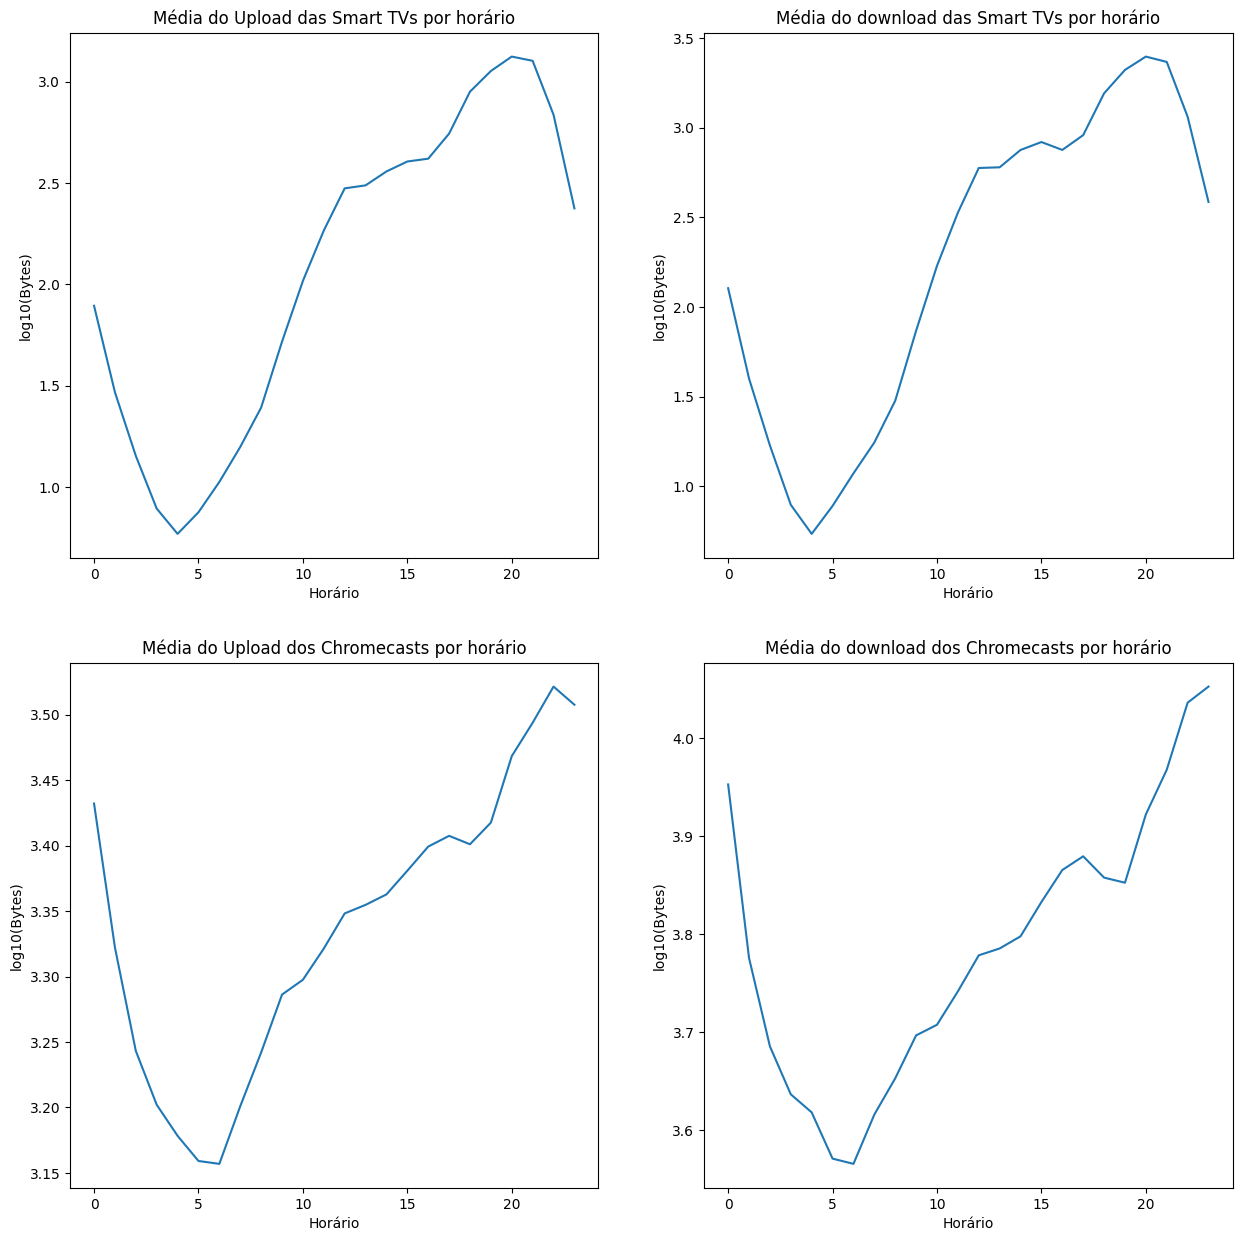

In [54]:
def plot_data(df, ax, title):
    """Plot the data on the given axis with the given title."""
    ax.plot(df)
    ax.set_title(title)
    ax.set_xlabel("Horário")
    ax.set_ylabel("log10(Bytes)")

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

plot_data(smart_tv_data.groupby("date_hour")["bytes_up"].mean(), ax[0][0], "Média do Upload das Smart TVs por horário")
plot_data(smart_tv_data.groupby("date_hour")["bytes_down"].mean(), ax[0][1], "Média do download das Smart TVs por horário")

plot_data(chromecast_data.groupby("date_hour")["bytes_up"].mean(), ax[1][0], "Média do Upload dos Chromecasts por horário")
plot_data(chromecast_data.groupby("date_hour")["bytes_down"].mean(), ax[1][1], "Média do download dos Chromecasts por horário")

plt.show()

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))

plot_data(smart_tv_data, ax[0][0], "Média do Upload das Smart TVs por horário")
plot_data(smart_tv_data, ax[0][1], "Média do download das Smart TVs por horário")

plot_data(chromecast_data, ax[1][0], "Média do Upload dos Chromecasts por horário")
plot_data(chromecast_data, ax[1][1], "Média do download dos Chromecasts por horário")

plt.show()

# Finding Hours with More Traffic

# Correlation Stats in Hours with More Traffic

# Comparation between Devices

# Conclution